In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# CORRELATION HEAT MAP CREATION FUNCTION


In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

#READING THE CSV FILE

In [ ]:
Data = pd.read_csv("titanic-passengers.csv",sep=';',header = 0)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# PREPROCESSING STAGE

In [ ]:
Data['Age'] = Data['Age'].fillna(Data['Age'].mean(), inplace= False)
Data.drop('Cabin', axis = 1, inplace = True)

Sex = pd.get_dummies(Data['Sex'], drop_first = True)
Embarked = pd.get_dummies(Data['Embarked'])

Data = pd.concat([Data, Sex, Embarked], axis = 1)
Data.drop(['PassengerId', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
Encoder = LabelEncoder()
Data['Survived'] = Encoder.fit_transform(Data['Survived'])
Data.rename(columns = {'male' : 'Sex'}, inplace = True)


# THE DATAFRAME NOW HAS NO NULL VALUES

In [ ]:
print('Number of null values in the Dataframe = ' + str(Data.isnull().sum().sum()))

Number of null values in the Dataframe = 0


# DATA VISUALIZATION STEP

Text(0.5, 1.0, 'Correlation between Sex and Age')

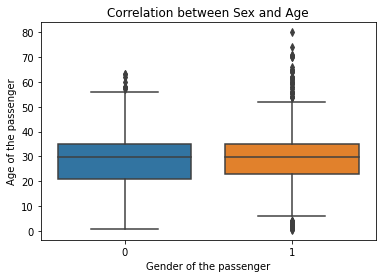

In [ ]:
sns.boxplot(x = 'Sex', y = 'Age', data = Data)
plt.xlabel('Gender of the passenger')
plt.ylabel('Age of the passenger')
plt.title('Correlation between Sex and Age')

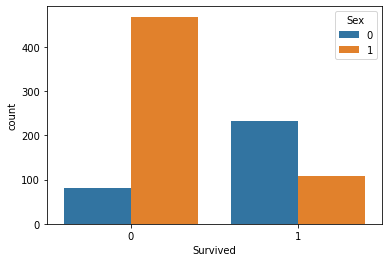

In [ ]:
sns.countplot(x = 'Survived', data = Data, hue = 'Sex')

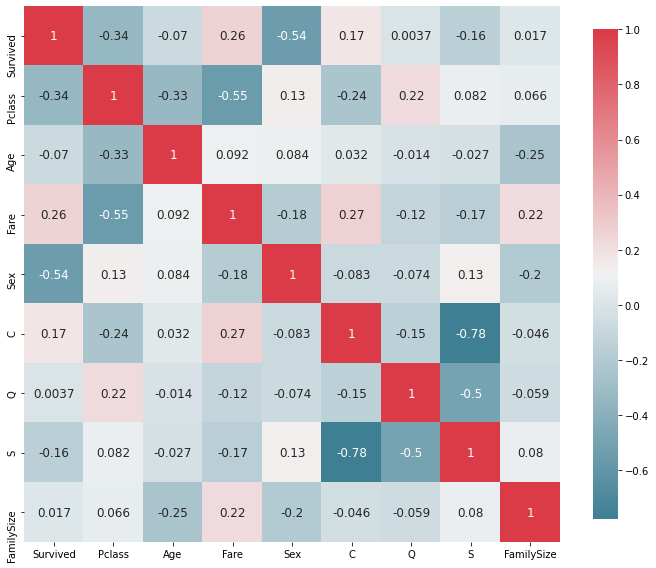

In [ ]:
plot_correlation_map(Data)

The heatmap shows the correlation between every column in the data frame in a 2d matrix shape which can help us to know the correlation between any set we want easily.
The value of a correlation can take any values from -1 to 1 and
the correlation between every column and its self is equal to 1 --> Which is the highest in any correlation between two sets.

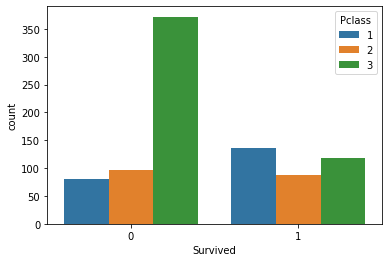

In [ ]:
sns.countplot(x = 'Survived', data = Data, hue = 'Pclass')

USING THE GROUPBY MEAN TO VIEW THE RELATION BETWEEN Pclass AND Survived


In [ ]:
Data2 = Data[['Survived','Pclass']].groupby(['Pclass'], as_index = True).mean()
Data2

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
Data

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,0,2,"Collander, Mr. Erik Gustaf",28.000000,0,0,13.0000,1,0,0,1
1,0,3,"Moen, Mr. Sigurd Hansen",25.000000,0,0,7.6500,1,0,0,1
2,0,3,"Jensen, Mr. Hans Peder",20.000000,0,0,7.8542,1,0,0,1
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.000000,0,4,21.0750,0,0,0,1
4,0,1,"Davidson, Mr. Thornton",31.000000,1,0,52.0000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,30.0708,0,1,0,0
887,0,3,"Sirayanian, Mr. Orsen",22.000000,0,0,7.2292,1,1,0,0
888,0,3,"Cacic, Miss. Marija",30.000000,0,0,8.6625,0,0,0,1
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",29.699118,0,0,7.8958,1,0,0,1


In [ ]:
Title_Dictionary = {
    
     "Capt": "Officer",
     "Col": "Officer",
     "Major": "Officer",
     "Dr": "Officer",
     "Rev": "Officer",
     "Jonkheer": "Royalty",
     "Don": "Royalty",
     "Sir" : "Royalty",
     "Lady" : "Royalty",
     "the Countess": "Royalty",
     "Dona": "Royalty",
     "Mme": "Miss",
     "Mlle": "Miss",
     "Miss" : "Miss",
     "Ms": "Mrs",
     "Mr" : "Mrs",
     "Mrs" : "Mrs",
     "Master" :  "Master"
}


#EXTRACTING THE TITLE FROM THE NAME COLUMN

In [ ]:
def Splitter(Name):
  Name = Name.split(' ')
  if '.' in Name[1]:
    Name2 = Name[1].split('.')
    FinalName = Name2[0]
  elif ',' in Name[1]:
    Name2 = Name[1].split(',')
    FinalName = Name2[0]
  else:
    FinalName = Name[1]
  
  return (FinalName)


In [ ]:
List = []
for elem in Data['Name']:
  List.append(Splitter(elem))
Data['Title'] = List

In [ ]:
List

['Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Dr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Major',
 'Mrs',
 'Don',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Dr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Master',
 'Miss',
 'Mr',
 'Rev',
 'Mr',
 'Mrs',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Col',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',

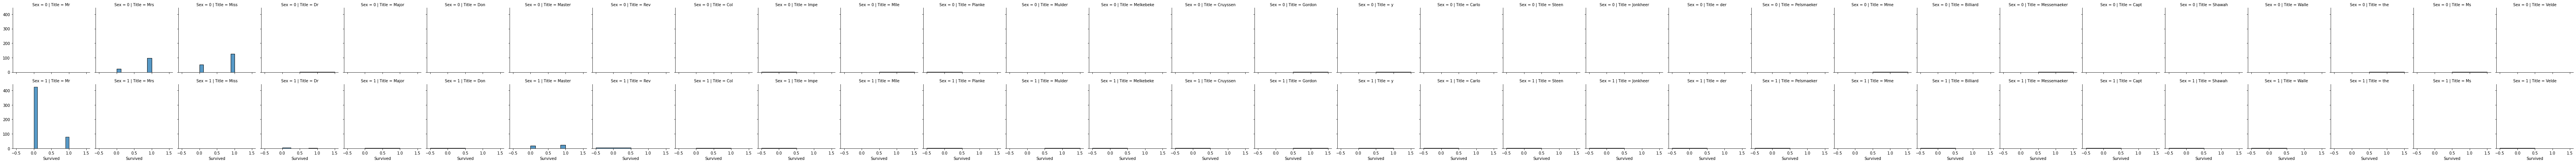

In [ ]:
Review = sns.FacetGrid(Data, col="Title", row="Sex")
Review.map(sns.histplot, "Survived")

#CREATING THE FAMILYSIZE COLUMN


In [ ]:
Data['FamilySize'] = Data['Parch'] + Data['SibSp']
Data['FamilySize']

0      0
1      0
2      0
3      4
4      1
      ..
886    1
887    0
888    0
889    0
890    0
Name: FamilySize, Length: 891, dtype: int64

In [ ]:
Data.drop(['SibSp','Parch'], axis = 1, inplace = True)
Data.head()

,Survived,Pclass,Name,Age,Fare,Sex,C,Q,S,Title,FamilySize
0,0,2,"Collander, Mr. Erik Gustaf",28.0,13.0000,1,0,0,1,Mr,0
1,0,3,"Moen, Mr. Sigurd Hansen",25.0,7.6500,1,0,0,1,Mr,0
2,0,3,"Jensen, Mr. Hans Peder",20.0,7.8542,1,0,0,1,Mr,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.0,21.0750,0,0,0,1,Mrs,4
4,0,1,"Davidson, Mr. Thornton",31.0,52.0000,1,0,0,1,Mr,1


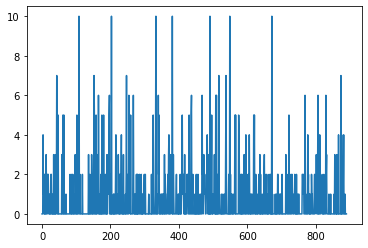

In [ ]:
Data["FamilySize"].plot()